In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipynb.fs.defs.tdc_data_analysis import line_hist

# Analysis of Centroided Data

In [39]:
background= pd.read_csv('new_background11.csv',index_col=False)
background.delta_t = background.delta_t*1e9

<AxesSubplot:>

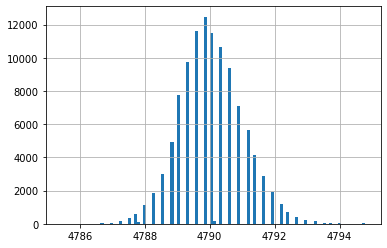

In [33]:
background.delta_t.hist(bins=100)

In [38]:
signal = pd.read_csv('new_signal8.csv',index_col=False)
signal.delta_t = signal.delta_t*1e9

In [7]:
signal_th = signal[(signal['delta_t']<4795 ) & (signal['delta_t']>4785) ]
background_th = background[(background['delta_t']<4795 ) &( background['delta_t']>4785) ]

In [40]:
len(background)

110000

In [41]:
len(signal)

116000

In [44]:
signal.describe()

,batch,x,y,delta_t
count,116000.00000,116000.000000,116000.000000,116000.000000
mean,57999.50000,100.897151,104.555972,4790.155375
std,33486.45995,36.640345,24.475183,1.251873
min,0.00000,43.041071,24.684420,4785.156136
25%,28999.75000,72.310779,88.616519,4789.324905
50%,57999.50000,94.708027,103.558195,4790.106175
75%,86999.25000,123.887377,120.901823,4790.887431
max,115999.00000,214.799419,196.428513,4794.793995


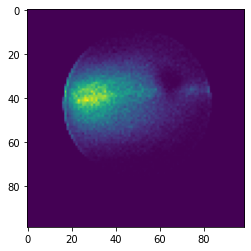

In [42]:
plt.imshow(np.histogram2d(signal['x'],
               signal['y'],
               bins=(np.linspace(0,255,100),np.linspace(0,255,100)))[0].T)

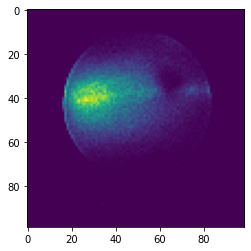

In [14]:
plt.imshow(np.histogram2d(signal_th['x'],
               signal_th['y'],
               bins=(np.linspace(0,255,100),np.linspace(0,255,100)))[0].T)

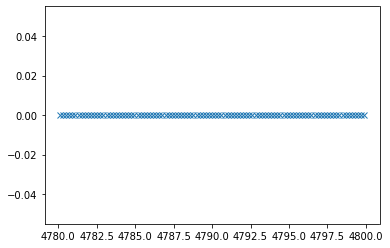

In [45]:
x_sg_t,y_sg_t = line_hist(signal.delta_t*1e9,normalized=False,bins=np.linspace(4780,4800,100),linestyle='None')

In [ ]:
x_bg_t,y_bg_t = line_hist(background.delta_t*1e9,normalized=False,bins=np.linspace(4780,4800,1000),
                          linestyle='None')

In [ ]:
print(len(signal),len(background))

In [ ]:
145/580 # many electron rejection/ len(background)

In [ ]:
155/620 # many electron rejection/ len(signal)

We multiply the signal by 1.25 because ??? 

In [ ]:
plt.plot(x_bg_t,1.25*y_sg_t-y_bg_t,linestyle='-')

In [ ]:
plt.plot(x_bg_t,1.25*y_sg_t-y_bg_t,linestyle='-',marker='.')

In [ ]:
plt.plot(x_bg_t,y_sg_t-y_bg_t)

In [ ]:
def get_fit_pts(xarr,yarr,threshold=300):
    '''Thresholds the binned data and returns the thresholded data '''
    mask = (yarr>threshold)
    xarr = xarr[mask]
    yarr = yarr[mask]
    xarr = xarr
    plt.plot(xarr,yarr)
    plt.show()
    return xarr,yarr

In [ ]:
x_bg_t, y_bg_t = get_fit_pts(x_bg_t,y_bg_t)
x_sg_t, y_sg_t = get_fit_pts(x_sg_t,y_sg_t)

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def fit_f(x,m1,s1,a1):   # gaussian fit
    y = a1*np.exp(-(x-m1)**2/s1**2)
    return y
def plot_f(m1,s1,a1):
    x_tmp = np.linspace(4780,4800,5000)
    y_tmp = fit_f(x_tmp,m1,s1,a1)
    return y_tmp

In [ ]:
def fit_to_curve(x_bg_t,y_bg_t,a0):    # fits and returns fit function y's
    fit_param_bg, fit_cov_bg =curve_fit(fit_f,x_bg_t,y_bg_t,p0=[-2, 4790, a0])
    print('Mean1:%f\n Std1: %f\n Amp1: %f\n' % tuple(fit_param_bg),'\n')
    print(fit_cov_bg)
    y_f = plot_f(*fit_param_bg)
    plt.plot(x_bg_t,y_bg_t,linestyle='None',marker='x')
    plt.show()
    return y_f

In [ ]:
y_bg_fit =fit_to_curve(x_bg_t,y_bg_t,12000)

In [ ]:
y_sg_fit = fit_to_curve(x_sg_t,y_sg_t,12000)

In [ ]:
plt.plot(np.linspace(4780,4800,5000),y_sg_fit*1.25-y_bg_fit)

In [ ]:
sns.displot(data=signal[signal['delta_t']*1e9<4795]-0*background[background['delta_t']*1e9<4795]
            ,x='x',y='y',bins=100)

In [46]:
def to_plot_2dhist(var1,var2,bin1=None,bin2=None,signal_factor=1.25,background_factor=1,full_output=False):
    global signal,background
    def choose_bins(var):
        if var in ['x','y']:
            bins = np.linspace(0,255,100)
        if var == 'delta_t':
            bins = np.linspace(4780,4800,30)
        return bins
    
    if bin1 is None:
        bin1 = choose_bins(var1)
    if bin2 is None:
        bin2 = choose_bins(var2)
        
    signal_hist = np.histogram2d(signal[var1],
                                 signal[var2],
                                 bins=(bin1,bin2))
    background_hist = np.histogram2d(background[var1],
                                     background[var2],
                                     bins=(bin1,bin2))
    if full_output:
        return signal_factor*signal_hist[0]-background_hist[0], signal_factor[1:]
    return signal_factor*signal_hist[0].T-background_factor*background_hist[0].T

In [47]:
from matplotlib.patches import ConnectionPatch
from scipy.signal import argrelextrema

(array([ 15,  41,  68,  93, 119, 145, 171, 197, 223, 249, 275, 301, 327,
       354, 379, 405, 432, 457, 483, 510, 535, 561, 588, 613, 639, 666,
       691, 718, 744, 769, 796, 822, 847, 874, 900, 926, 952, 978]),)


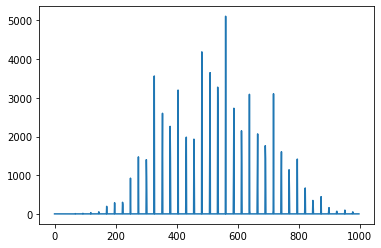

In [49]:
print(argrelextrema(to_plot_2dhist('y','delta_t',background_factor=1,
                          signal_factor=1.6,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,1000),
                         ).sum(axis=1),
             np.greater))
plt.plot(to_plot_2dhist('y','delta_t',background_factor=1,
                          signal_factor=1.6,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,1000),
                         ).sum(axis=1))
plt.show()

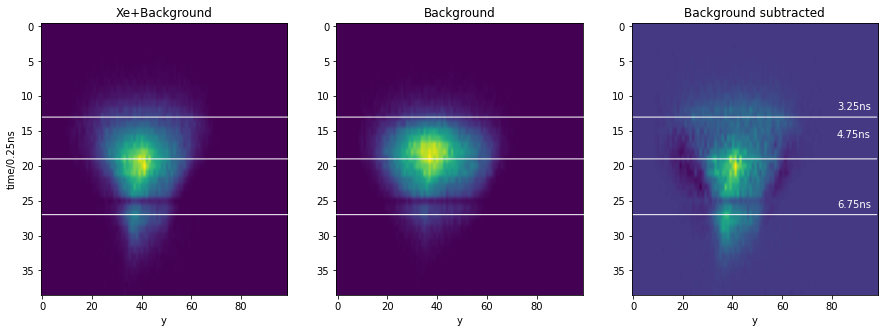

In [61]:


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

plt.xlabel('y')
plt.ylabel('time/0.25ns')
plt.title('Xe+Background')


ax2 = fig.add_subplot(132)
plt.xlabel('y')
plt.title('Background')


ax3 = fig.add_subplot(133)
plt.xlabel('y')
plt.title('Background subtracted')



for y in [13, 19, 27]:
    con = ConnectionPatch(xyA=(0,y), xyB=(98,y), coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax3, color="white")

    ax3.add_artist(con)

im1 = ax1.imshow(to_plot_2dhist('y','delta_t',background_factor=0,
                          signal_factor=1,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,40),
                         )
           ,aspect='auto')


im2 = ax2.imshow(to_plot_2dhist('y','delta_t',background_factor=-1,
                          signal_factor=0,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,40),
                         )
           ,aspect='auto')




im3=ax3.imshow(to_plot_2dhist('y','delta_t',background_factor=1,
                          signal_factor=1.6,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,40),
                         )
           ,aspect='auto')

plt.text(82,12,'3.25ns',color='white')
plt.text(82,16,'4.75ns',color='white')
plt.text(82,26,'6.75ns',color='white')


plt.savefig('figures/t_vs_y.png')

(array([13, 19, 27]),)


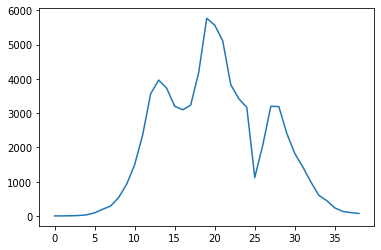

In [54]:
print(argrelextrema(to_plot_2dhist('x','delta_t',background_factor=1,
                          signal_factor=1.6,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,40),
                         ).sum(axis=1),
             np.greater))
plt.plot(to_plot_2dhist('x','delta_t',background_factor=1,
                          signal_factor=1.6,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,40),
                         ).sum(axis=1))
plt.show()

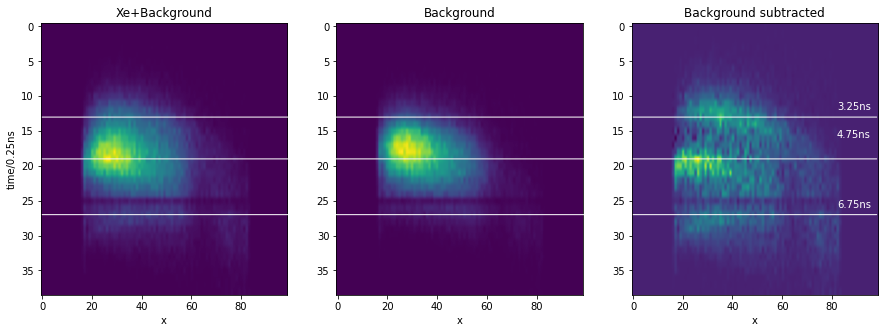

In [62]:


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

plt.xlabel('x')
plt.ylabel('time/0.25ns')
plt.title('Xe+Background')


ax2 = fig.add_subplot(132)
plt.xlabel('x')
plt.title('Background')


ax3 = fig.add_subplot(133)
plt.xlabel('x')
plt.title('Background subtracted')

x_maxima = [13, 19, 27]

for y in x_maxima:
    con = ConnectionPatch(xyA=(0,y), xyB=(98,y), coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax3, color="white")

    ax3.add_artist(con)
    


im1 = ax1.imshow(to_plot_2dhist('x','delta_t',background_factor=0,
                          signal_factor=1,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,40),
                         )
           ,aspect='auto')


im2 = ax2.imshow(to_plot_2dhist('x','delta_t',background_factor=-1,
                          signal_factor=0,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,40),
                         )
           ,aspect='auto')




im3=ax3.imshow(to_plot_2dhist('x','delta_t',background_factor=1,
                          signal_factor=1.6,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(4785,4795,40),
                         )
           ,aspect='auto')



plt.text(82,12,'3.25ns',color='white')
plt.text(82,16,'4.75ns',color='white')
plt.text(82,26,'6.75ns',color='white')


plt.savefig('figures/t_vs_x.png')

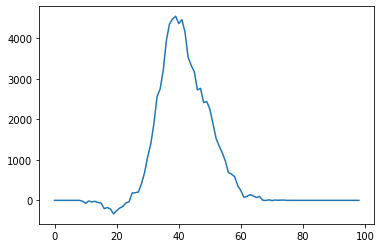

In [63]:
plt.plot(to_plot_2dhist('x','y',background_factor=1,
                          signal_factor=1.6,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(0,255,100),
                         ).sum(axis=1))

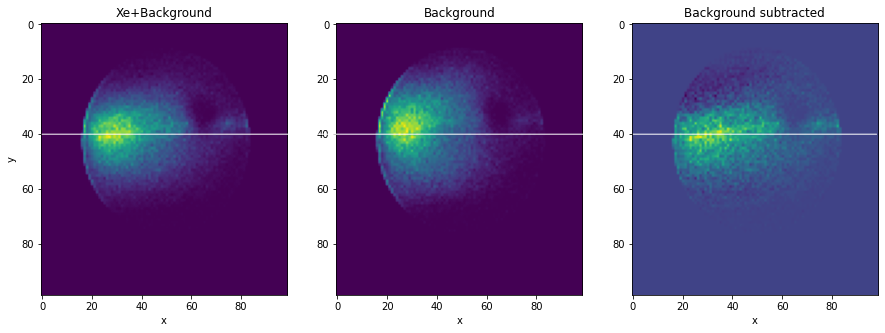

In [64]:


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Xe+Background')


ax2 = fig.add_subplot(132)
plt.xlabel('x')
plt.title('Background')


ax3 = fig.add_subplot(133)
plt.xlabel('x')
plt.title('Background subtracted')

con = ConnectionPatch(xyA=(0,40), xyB=(98,40), coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax3, color="white")

ax3.add_artist(con)

im1 = ax1.imshow(to_plot_2dhist('x','y',background_factor=0,
                          signal_factor=1,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(0,255,100),
                         )
           ,aspect='auto')


im2 = ax2.imshow(to_plot_2dhist('x','y',background_factor=-1,
                          signal_factor=0,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(0,255,100),
                         )
           ,aspect='auto')




im3=ax3.imshow(to_plot_2dhist('x','y',background_factor=1,
                          signal_factor=1.6,
                          bin1= np.linspace(0,255,100),
                        bin2= np.linspace(0,255,100),
                         )
           ,aspect='auto')



plt.savefig('figures/x_vs_y.png')

interpolate and keep norms constant

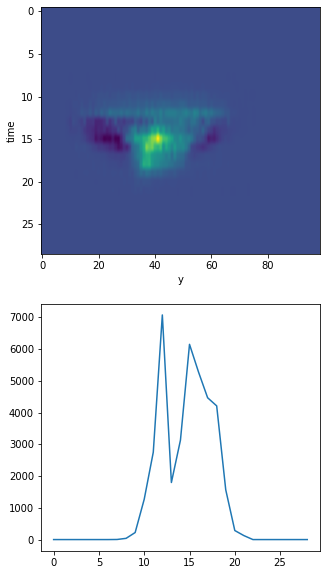

In [156]:
fig = plt.figure(figsize=(5,10))
fig.add_subplot(211)
plt.imshow(to_plot_2dhist('y','delta_t'),aspect='auto')
plt.xlabel('y')
plt.ylabel('time')

fig.add_subplot(212)
plt.plot(to_plot_2dhist('y','delta_t').sum(axis=1))

plt.show()

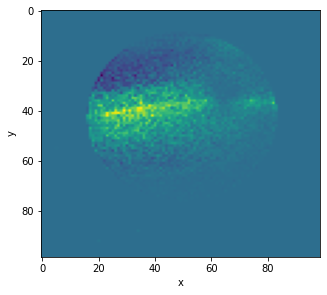

In [151]:
fig = plt.figure(figsize=(5,10))
fig.add_subplot(211)
plt.imshow(to_plot_2dhist('x','y'),aspect='auto')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

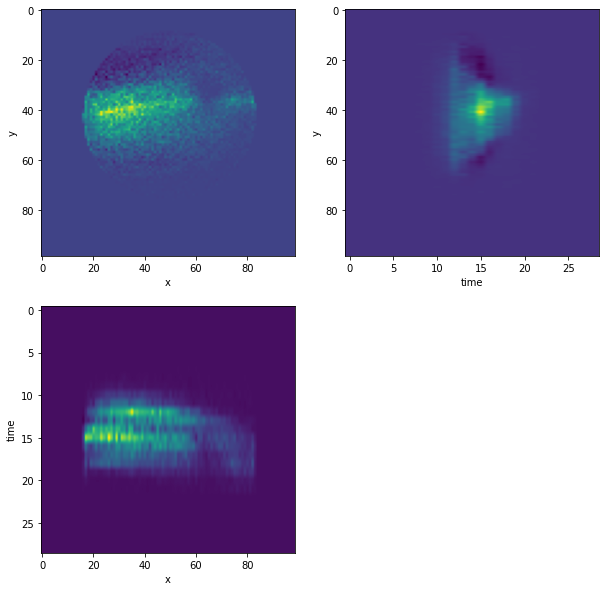

In [66]:

fig = plt.figure(figsize=(10,10))


fig.add_subplot(221)




plt.imshow(to_plot_2dhist('x','y',signal_factor=1.6),aspect='auto')
plt.xlabel('x')
plt.ylabel('y')


fig.add_subplot(223)



plt.imshow(to_plot_2dhist('x','delta_t',signal_factor=1.6),aspect='auto')
plt.xlabel('x')
plt.ylabel('time')


fig.add_subplot(222)


plt.imshow(to_plot_2dhist('delta_t','y',signal_factor=1.6),aspect='auto',)
plt.xlabel('time')
plt.ylabel('y')


plt.show()

<IPython.core.display.Javascript object>


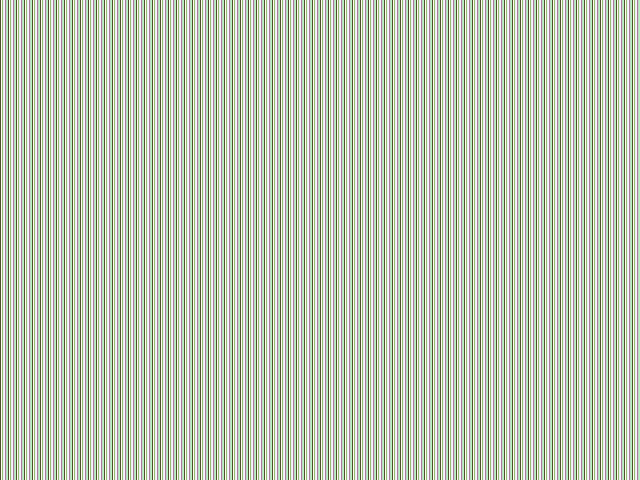

In [235]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
df = batches[(batches['delta_t']<4800) & (batches['delta_t']>4785)]
x = df['x']
y = df['y']
z = df['delta_t']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("t")

ax.scatter(x, y, z)
plt.show()

# Comparing Center of Mass Centroiding and Max Centroiding

In [19]:
df = pd.read_csv('preprocessed11.csv')

In [20]:
df.head()

,toa,tot,x,y,tdc1,tdc2,batch
0,0.003464,100,177,44,0.003382,0.003465,0
1,0.003464,175,175,43,0.003382,0.003465,0
2,0.003464,350,179,43,0.003382,0.003465,0
3,0.003464,150,181,40,0.003382,0.003465,0
4,0.003464,525,176,43,0.003382,0.003465,0


In [21]:
batch = df[df['batch']==0]

In [22]:
def max_centroid(batch):
    max_ind = batch.tot.argmax()
    x = batch.iloc[max_ind].x
    y = batch.iloc[max_ind].y
    return np.array([x,y])

In [23]:
def max_centroid_np(batch):
    tot = np.array(batch.tot)
    xs = np.array(batch.x)
    ys = np.array(batch.y)
    max_ind = tot.argmax()
    x= xs[max_ind]
    y = ys[max_ind]
    return np.array([x,y])

In [24]:
def com_centroid(batch):
    total_tot = batch.tot.sum()
    x = (batch.x* batch.tot).sum()/total_tot
    y = (batch.y* batch.tot).sum()/total_tot
    return np.array([x,y])

In [25]:
def com_centroid_np(batch):
    tot = np.array(batch.tot)
    xs = np.array(batch.x)
    ys = np.array(batch.y)
    total_tot = tot.sum()
    x = (xs* tot).sum()/total_tot
    y = (ys* tot).sum()/total_tot
    return np.array([x,y])

In [198]:
com_centroid(batch)-com_centroid_np(batch)

array([0., 0.])

In [52]:
com_centroid(batch)

(177.43805309734512, 40.542983565107455)

In [65]:
batch.tot.max()

4950

In [66]:
batch.tot.argmax()

65

In [68]:
batch.iloc[65]

toa         0.006212
tot      4950.000000
x         149.000000
y          40.000000
tdc1        0.006203
tdc2        0.006212
batch       1.000000
Name: 115, dtype: float64

In [26]:
def plot_centroids(batch_num):
    global df

    def plot_single(batch_num):
        batch = df[df['batch'] ==batch_num]
        plt.scatter(*max_centroid(batch),marker='s',color='red')
        plt.scatter(*com_centroid(batch),marker='s',color='blue')
        sns.scatterplot(data=batch,x='x',y='y',hue='tot')
        print(np.linalg.norm(max_centroid(batch)-com_centroid(batch)))
        plt.show()
        print('-----')
    if type(batch_num)==list:
        for num in batch_num:
            plot_single(num)
    elif type(batch_num) == int:
        plot_single(batch_num)
    


In [27]:
def dist_centroids(batch):
    return np.linalg.norm(max_centroid(batch)-com_centroid(batch))

In [29]:
dist_df=df.groupby('batch').apply(dist_centroids)

In [181]:
dist_df.describe()

count    10000.000000
mean         0.825848
std          0.443154
min          0.000000
25%          0.501959
50%          0.794018
75%          1.105325
max          6.822784
dtype: float64

In [186]:
%timeit df.groupby('batch').apply(max_centroid)

4.12 s ± 156 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [205]:
%timeit df.groupby('batch').apply(max_centroid_np) # everything is computed in np

1.55 s ± 34.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [187]:
%timeit df.groupby('batch').apply(com_centroid)   # compute total_tot twice

6.73 s ± 257 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [193]:
%timeit df.groupby('batch').apply(com_centroid)   # compute total_tot once & no conversion to np

6.65 s ± 278 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [199]:
%timeit df.groupby('batch').apply(com_centroid_np)   # compute total_tot once & all np

2 s ± 349 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Woow!!! Numpy is much faster! According to interwebs this is because pandas is doing a lot of things with its indeces and all of these operations are performed in Python. Whereas numpy is going to Cython or C directly.
See [this blog post](https://penandpants.com/2014/09/05/performance-of-pandas-series-vs-numpy-arrays/)

<AxesSubplot:>

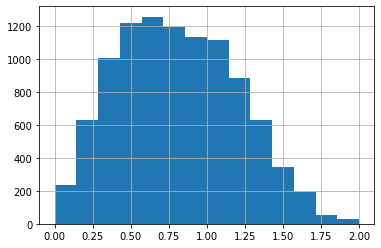

In [143]:
dist_df.hist(bins=np.linspace(0,2,15))

<AxesSubplot:>

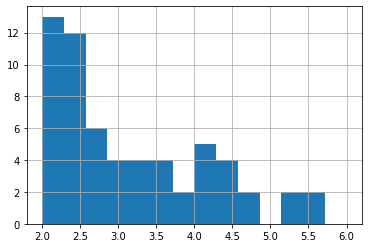

In [140]:
dist_df[dist_df>2].hist(bins=np.linspace(2,6,15))

In [28]:
dist_df[dist_df>2]

NameError: name 'dist_df' is not defined

In [141]:
max_dist_list = list(dist_df.sort_values(ascending=False).index[60:100])

In [144]:
pathological_list= list(dist_df.sort_values(ascending=False).index[:40])

2.024544019856809


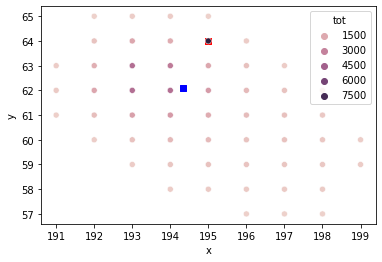

-----
2.0234924648278296


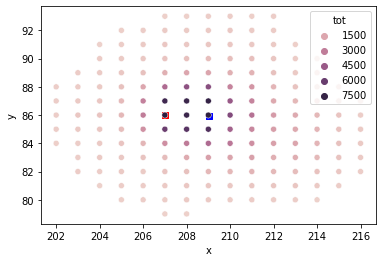

-----
1.9965668198250581


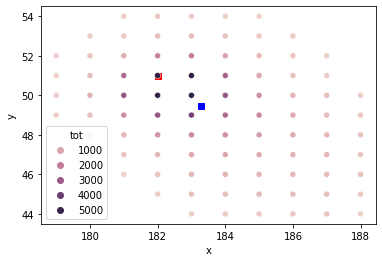

-----
1.9963358913342257


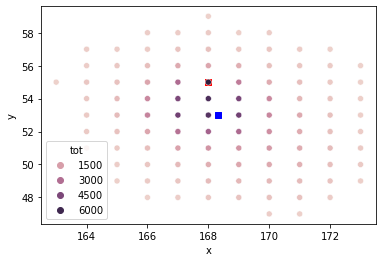

-----
1.9882881622756927


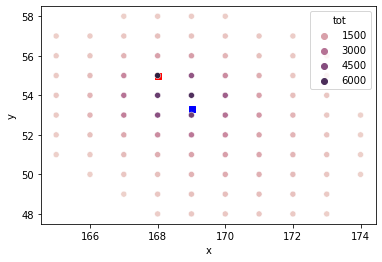

-----
1.9686277422368132


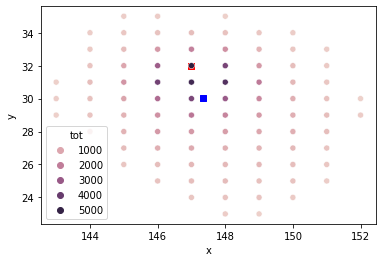

-----
1.968511436483221


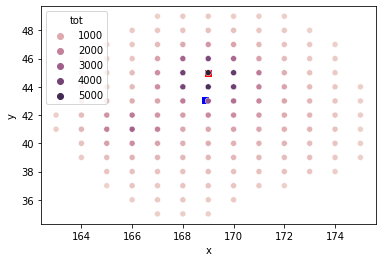

-----
1.9662714521980027


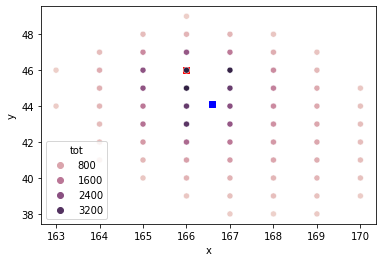

-----
1.9625803917420062


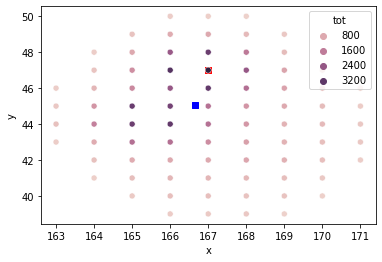

-----
1.9565903028993437


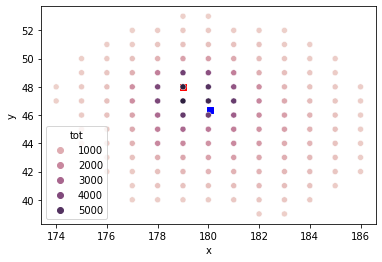

-----
1.949542846420946


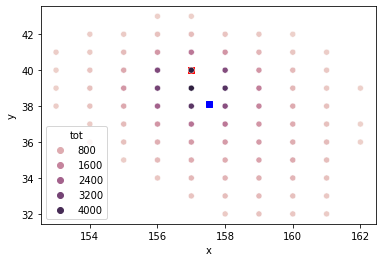

-----
1.947994845189854


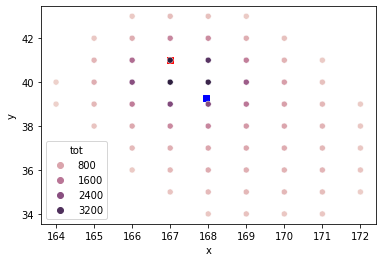

-----
1.9421410120830154


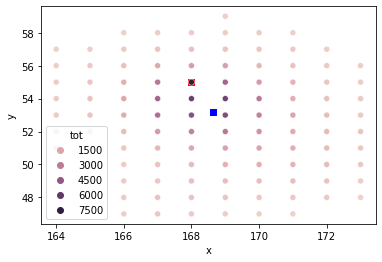

-----
1.9324681401312083


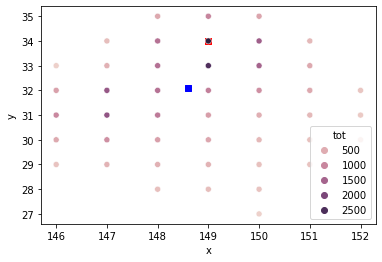

-----
1.9260363536451919


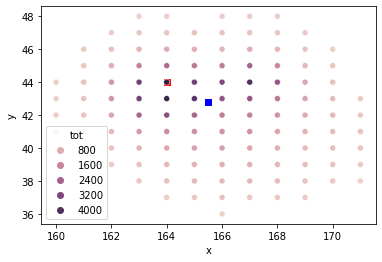

-----
1.9212256965280987


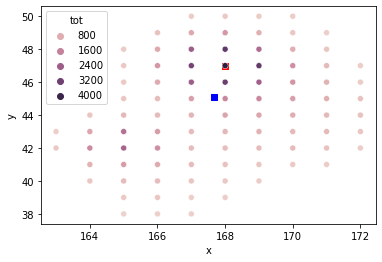

-----
1.9087121808579033


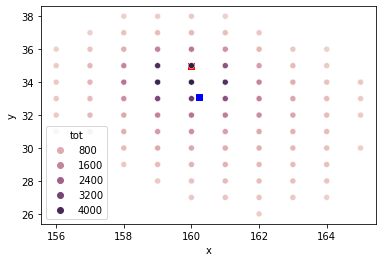

-----
1.9082099679651214


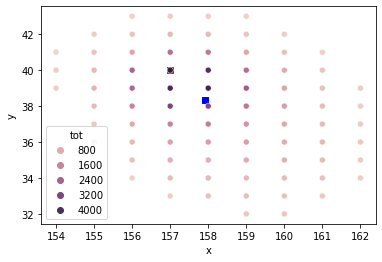

-----
1.90586594362236


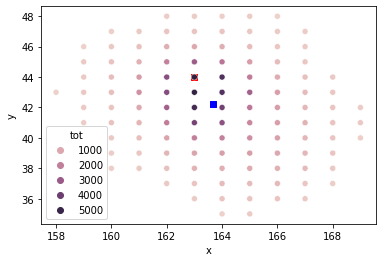

-----
1.9039801218492955


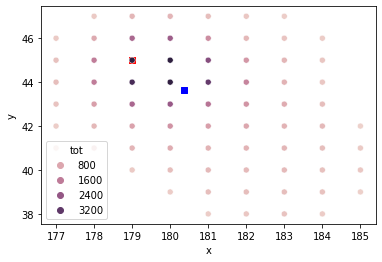

-----
1.899579159353779


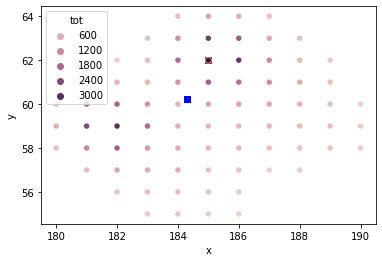

-----
1.8928186700923557


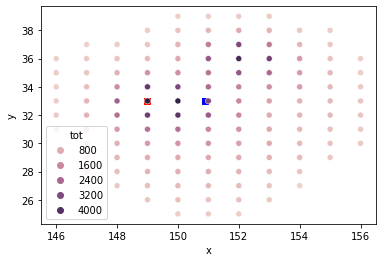

-----
1.892081283195866


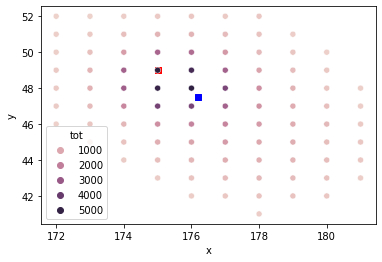

-----
1.8819619495737443


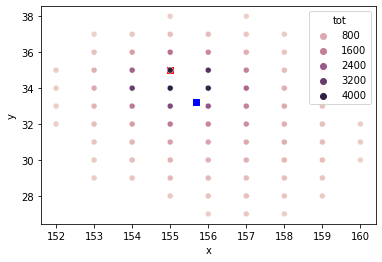

-----
1.8798998477839326


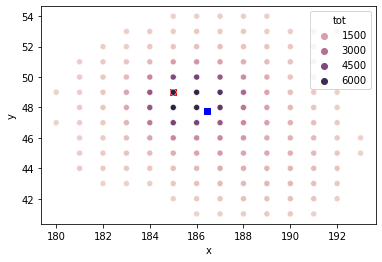

-----
1.8779726894662325


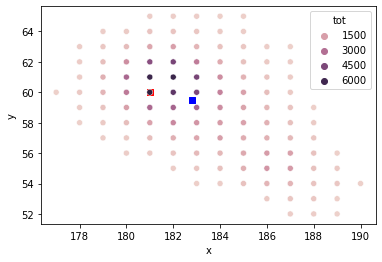

-----
1.8768476775159093


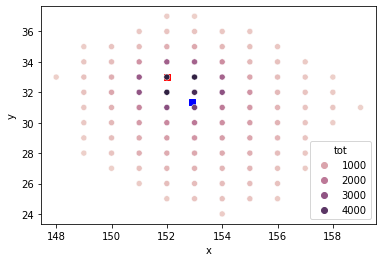

-----
1.8687491440183948


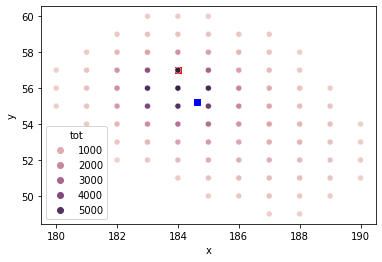

-----
1.862435714505308


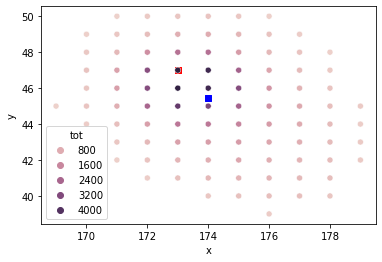

-----
1.859109931270623


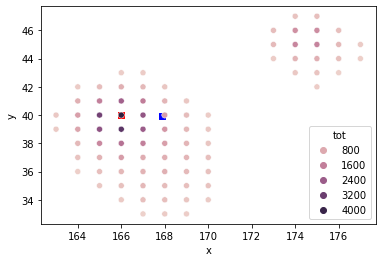

-----
1.8528915047919974


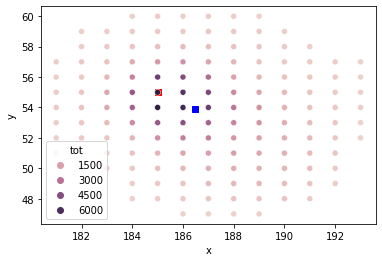

-----
1.8494601191649727


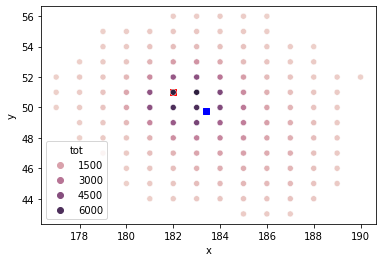

-----
1.8492863325953601


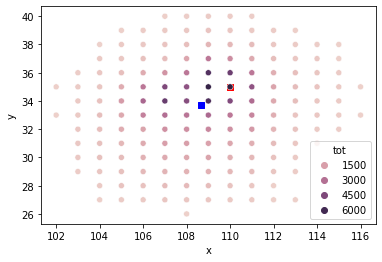

-----
1.8481426295405334


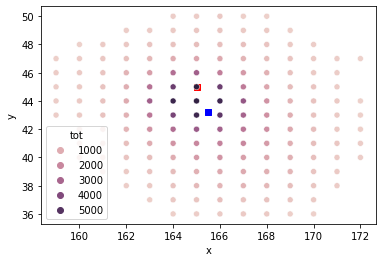

-----
1.8377660906931408


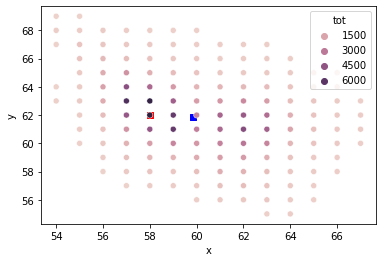

-----
1.836741720051751


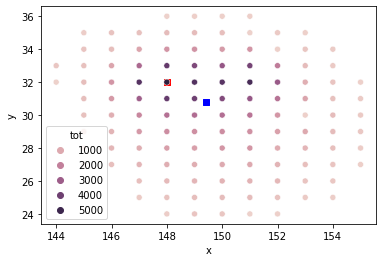

-----
1.8255305776443438


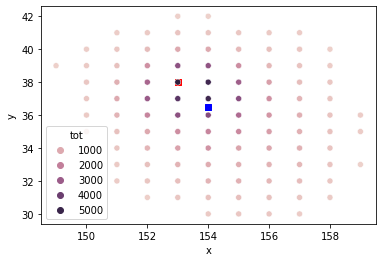

-----
1.813926334228155


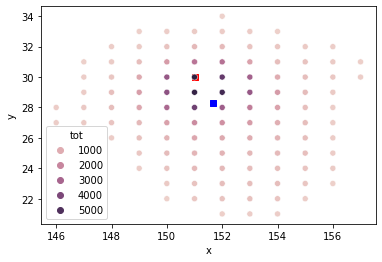

-----
1.8035260438104548


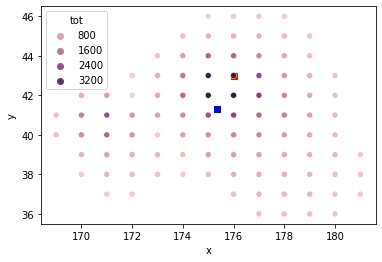

-----
1.8028132351486938


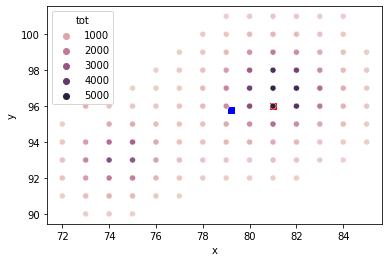

-----


In [222]:
plot_centroids(max_dist_list)    # removed so that file is smaller

6.822784239765862


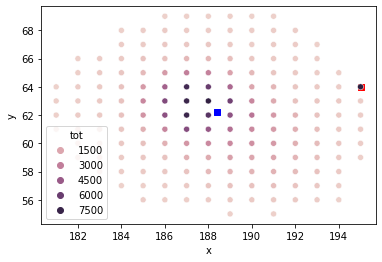

-----
6.814304737372091


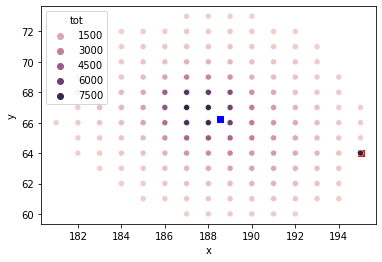

-----
5.473991864423594


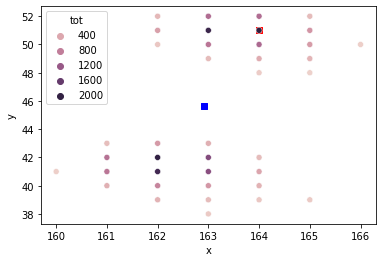

-----
5.446647622297143


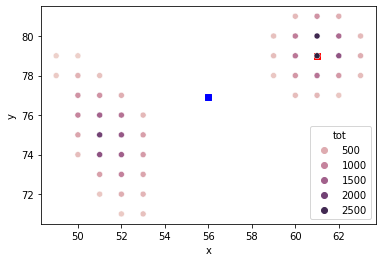

-----
5.277309920783497


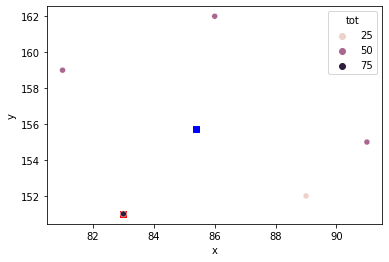

-----
5.276522256705739


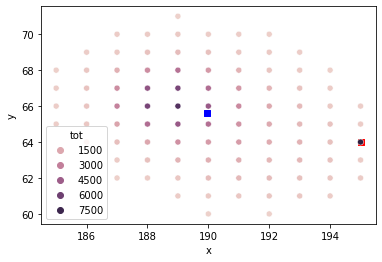

-----
4.836528888757561


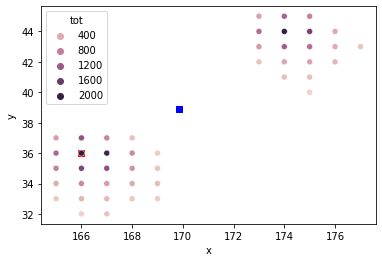

-----
4.785676196291656


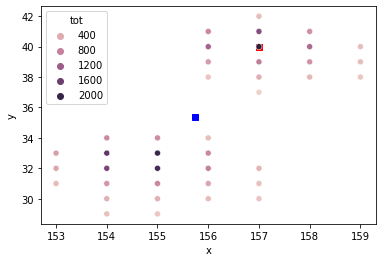

-----
4.559697357548745


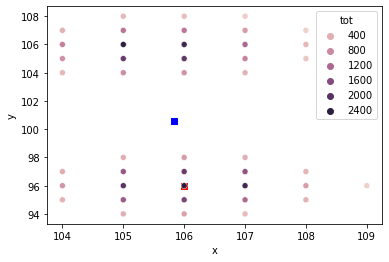

-----
4.504648047497122


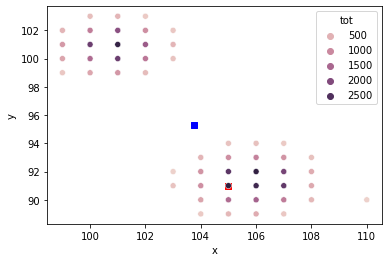

-----
4.387039233862291


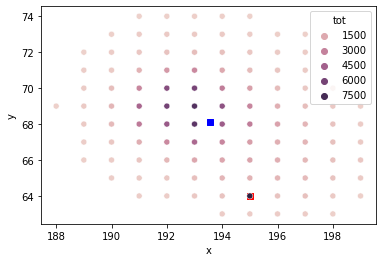

-----
4.35959461922741


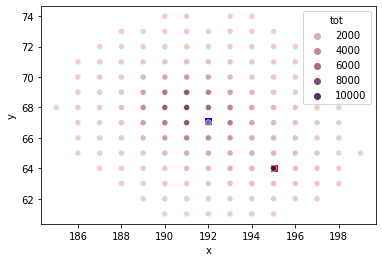

-----
4.220683590351892


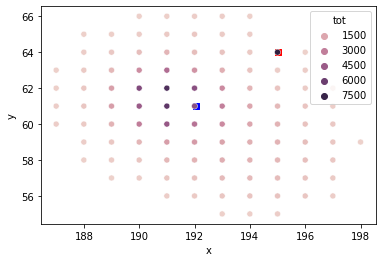

-----
4.194173679170678


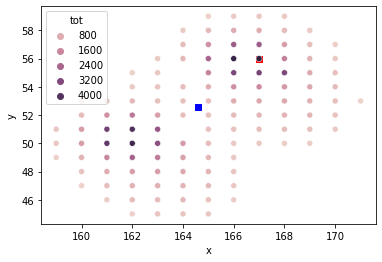

-----
4.147255770242019


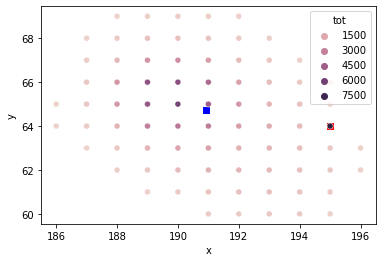

-----
4.058706840689668


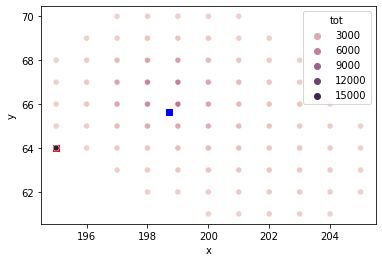

-----
4.057860781551526


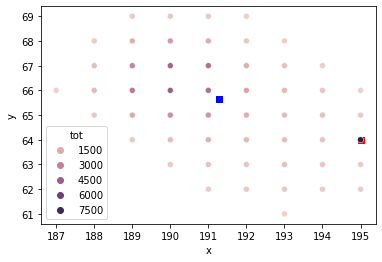

-----
3.77707917864194


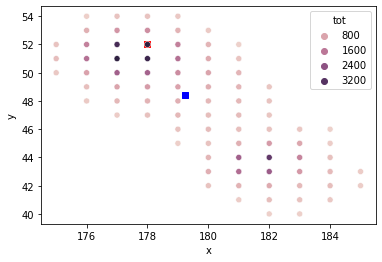

-----
3.7282026990110197


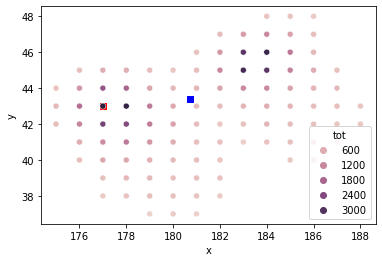

-----
3.6492715094996773


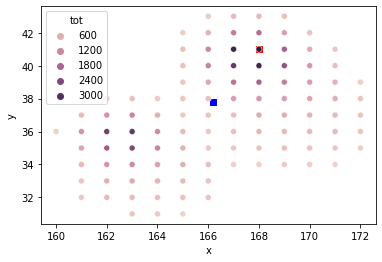

-----
3.647914507485474


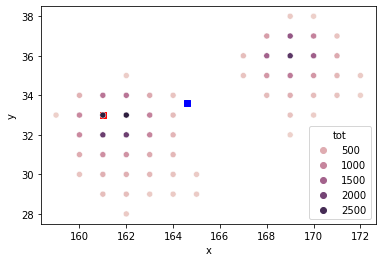

-----
3.5042694848840843


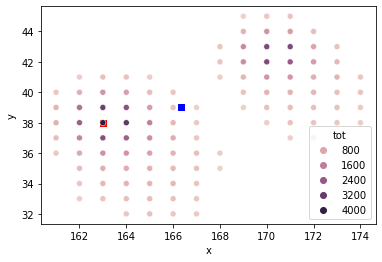

-----
3.4975854924207153


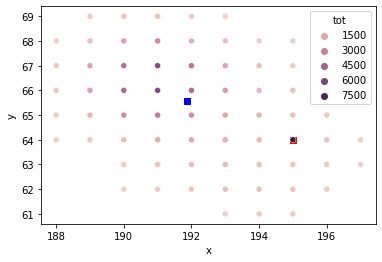

-----
3.3194593558192933


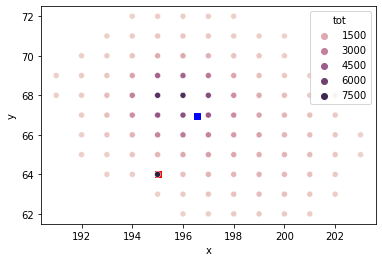

-----
3.213467341916099


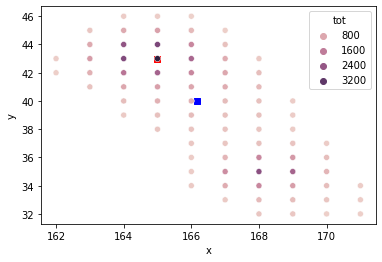

-----
3.1594734571667806


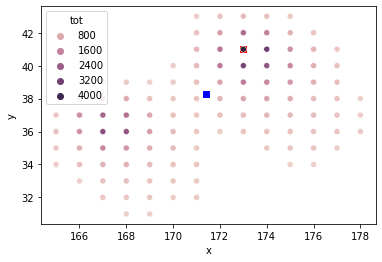

-----
3.1575817943552833


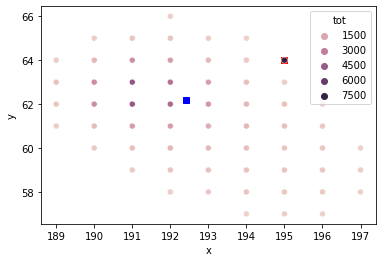

-----
3.1281786958514344


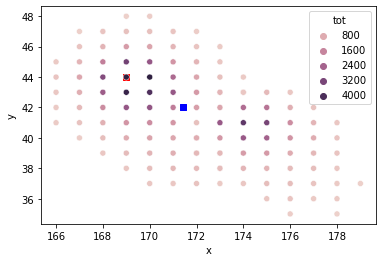

-----
3.1085762075631727


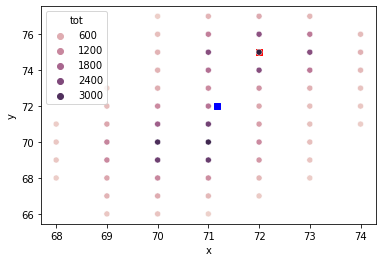

-----
3.1064893096213666


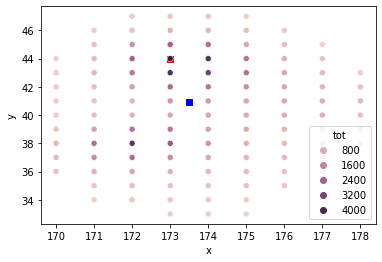

-----
2.9036864613670637


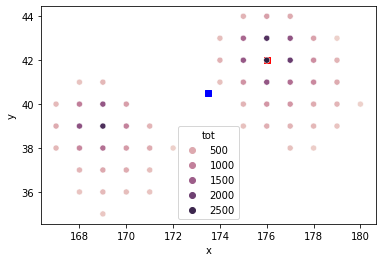

-----
2.800560888027422


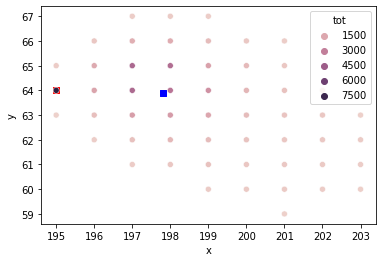

-----
2.7650893455942933


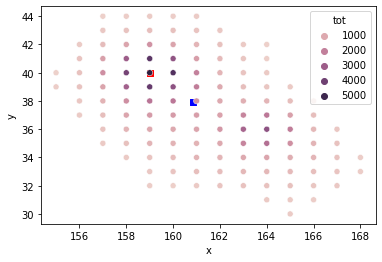

-----
2.7596626214572484


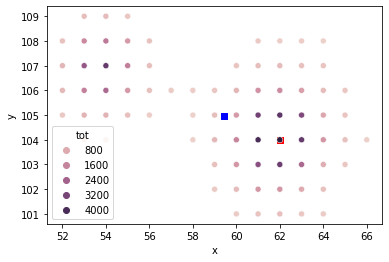

-----
2.7092380299355945


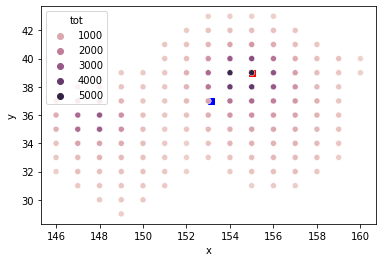

-----
2.679511042988004


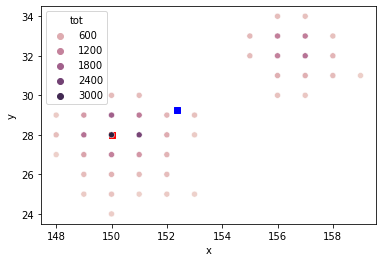

-----
2.6715149178258617


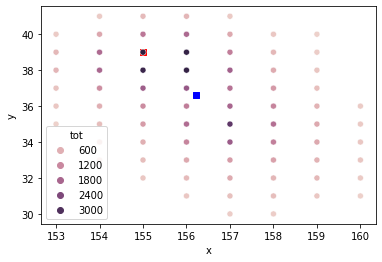

-----
2.567190182860513


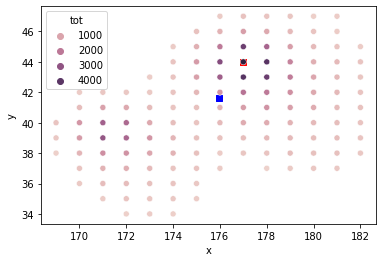

-----
2.549878960088894


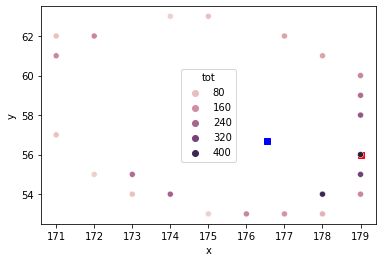

-----
2.542749058918133


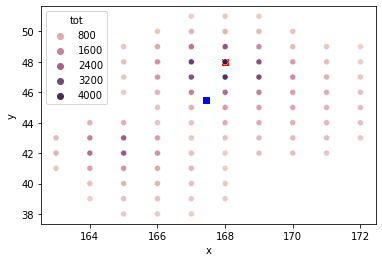

-----


In [223]:
plot_centroids(pathological_list)   # removed so that file is smaller